#### BY: Yash Pednekar

# TASK 1 : STOCK PREDICTION

#### Objective : To predict the stock price of a company using LSTM.

#### ABOUT DATASET
#### Google Stock Prediction

This dataset contains historical data of Google's stock prices and related attributes. 
It consists of 14 columns and a smaller subset of 1257 rows. <br>
Source : https://www.kaggle.com/datasets/shreenidhihipparagi/google-stock-prediction

### Step 1 : Importing libraries and data

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [13]:
df = pd.read_csv('Stock.csv')

###  Step 2 : Gathering insights

In [14]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [16]:
df.shape

(1258, 14)

In [7]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [17]:
df.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [9]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

#### There are no null values in the dataset

In [18]:
df = df[['date','open','close']]

In [19]:
# converting object dtype of date column to datetime dtype
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) 

In [20]:
df.set_index('date',drop=True,inplace=True)

In [21]:
df.head(10)

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71
2016-06-21,698.40,695.94
2016-06-22,699.06,697.46
2016-06-23,697.45,701.87
2016-06-24,675.17,675.22


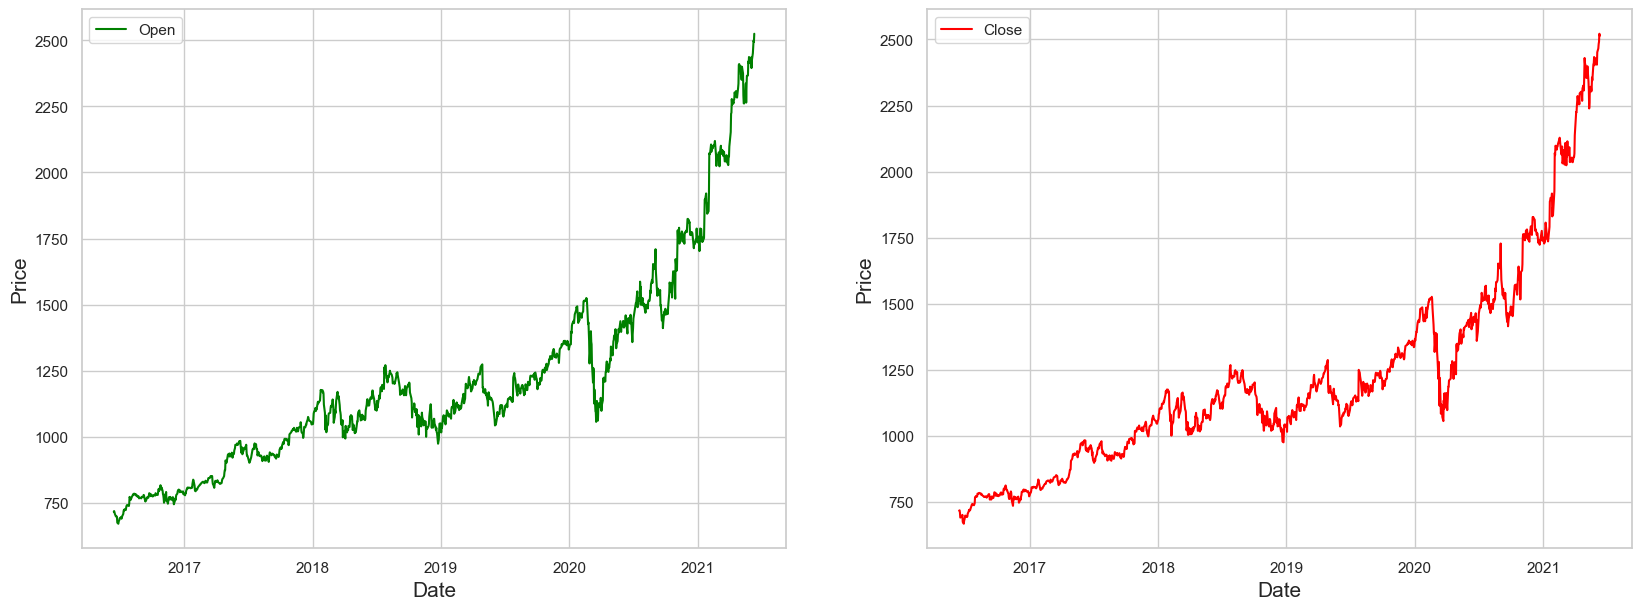

In [22]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Plot 'open' column
sns.lineplot(data=df, x=df.index, y='open', ax=ax[0], label='Open', color='green')
ax[0].set_xlabel('Date', size=15)
ax[0].set_ylabel('Price', size=15)
ax[0].legend()

# Plot 'close' column
sns.lineplot(data=df, x=df.index, y='close', ax=ax[1], label='Close', color='red')
ax[1].set_xlabel('Date', size=15)
ax[1].set_ylabel('Price', size=15)
ax[1].legend()

plt.show()

### Step 3 : Data pre-processing

In [23]:
# normalizing all the values of all columns using MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df)
df

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
...,...,...
2021-06-07,0.960300,0.970049
2021-06-08,0.975716,0.979092
2021-06-09,0.986289,0.983705


In [24]:
training_size = round(len(df) * 0.70) # Selecting 70 % for training and 30 % for testing
training_size

881

In [25]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((881, 2), (377, 2))

In [26]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [27]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((831, 50, 2), (831, 2), (327, 50, 2), (327, 2))

### Step 4 :  Creating LSTM Model

In [28]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
26/26 [==============================] - 7s 77ms/step - loss: 0.0058 - mean_absolute_error: 0.0544 - val_loss: 0.0155 - val_mean_absolute_error: 0.0997
Epoch 2/100
26/26 [==============================] - 1s 44ms/step - loss: 6.4599e-04 - mean_absolute_error: 0.0209 - val_loss: 0.0073 - val_mean_absolute_error: 0.0694
Epoch 3/100
26/26 [==============================] - 2s 59ms/step - loss: 3.5159e-04 - mean_absolute_error: 0.0143 - val_loss: 0.0033 - val_mean_absolute_error: 0.0448
Epoch 4/100
26/26 [==============================] - 2s 62ms/step - loss: 3.5816e-04 - mean_absolute_error: 0.0143 - val_loss: 0.0037 - val_mean_absolute_error: 0.0473
Epoch 5/100
26/26 [==============================] - 1s 56ms/step - loss: 3.2912e-04 - mean_absolute_error: 0.0140 - val_loss: 0.0028 - val_mean_absolute_error: 0.0402
Epoch 6/100
26/26 [==============================] - 2s 64ms/step - loss: 3.4228e-04 - mean_absolute_error: 0.0140 - val_loss: 0.0038 - val_mean_absolute_error: 0.0

26/26 [==============================] - 2s 84ms/step - loss: 9.9606e-05 - mean_absolute_error: 0.0073 - val_loss: 0.0013 - val_mean_absolute_error: 0.0279
Epoch 98/100
26/26 [==============================] - 2s 83ms/step - loss: 1.0008e-04 - mean_absolute_error: 0.0073 - val_loss: 0.0012 - val_mean_absolute_error: 0.0267
Epoch 99/100
26/26 [==============================] - 2s 76ms/step - loss: 1.0564e-04 - mean_absolute_error: 0.0074 - val_loss: 8.6506e-04 - val_mean_absolute_error: 0.0220
Epoch 100/100
26/26 [==============================] - 2s 75ms/step - loss: 9.0684e-05 - mean_absolute_error: 0.0069 - val_loss: 0.0012 - val_mean_absolute_error: 0.0266


In [30]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

11/11 [==============================] - 1s 14ms/step


array([[0.39026207, 0.39077535],
       [0.38140547, 0.38192055],
       [0.36414322, 0.36492896],
       [0.35128805, 0.35212854],
       [0.36598703, 0.36579028]], dtype=float32)

In [32]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = scaler.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1394.5146, 1392.4996],
       [1378.0952, 1376.0886],
       [1346.0924, 1344.5975],
       [1322.2599, 1320.8739],
       [1349.5106, 1346.1937]], dtype=float32)

## STEP 5 :  VISUALIZING ACTUAL VS PREDICTED DATA

In [37]:
df_merge = pd.concat([df.iloc[-264:].copy(), pd.DataFrame(test_inverse_predicted[-264:], columns=['open_predicted', 'close_predicted'], index=df.iloc[-264:].index)], axis=1)


In [38]:
# Inversing normalization/scaling 
df_merge[['open','close']] = scaler.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1408.944824,1403.872925
2020-05-28,1396.86,1416.73,1409.040527,1404.214600
2020-05-29,1416.94,1428.92,1402.006958,1397.683594
2020-06-01,1418.39,1431.82,1406.264404,1401.894897
2020-06-02,1430.55,1439.22,1412.803345,1408.170654


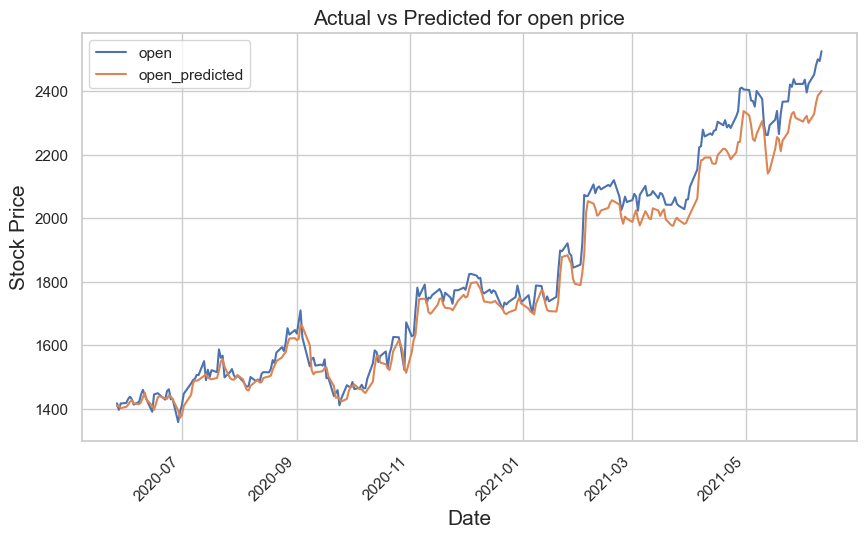

In [39]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

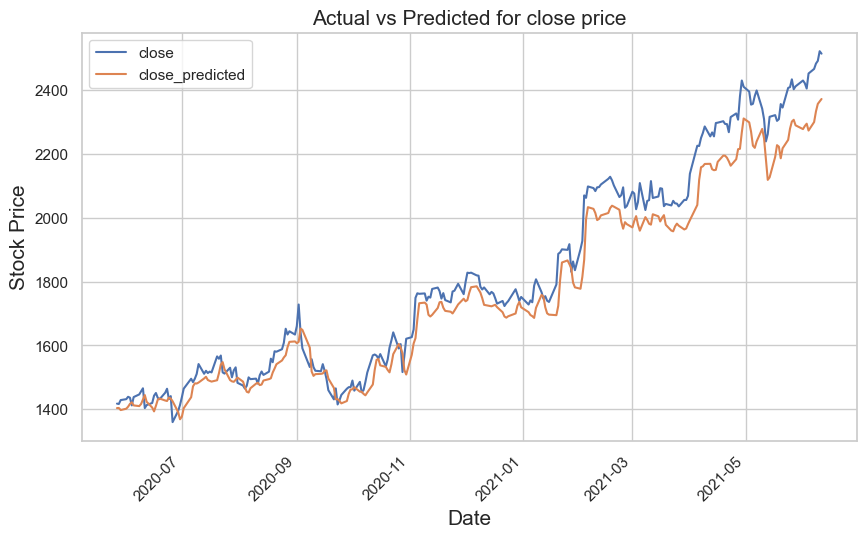

In [40]:
# plotting the actual close and predicted close prices on date index 
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

## STEP 6. PREDICTING UPCOMING 10 DAYS

In [49]:
# Creating a dataframe and adding 10 days to existing index 

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.50,2491.40,2385.070312,2356.619385
2021-06-10,2494.01,2521.60,2391.950195,2364.114990
2021-06-11,2524.92,2513.93,2399.818604,2371.923584
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [42]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [43]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 31ms/step


In [45]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = scaler.inverse_transform(upcoming_prediction[['open','close']])

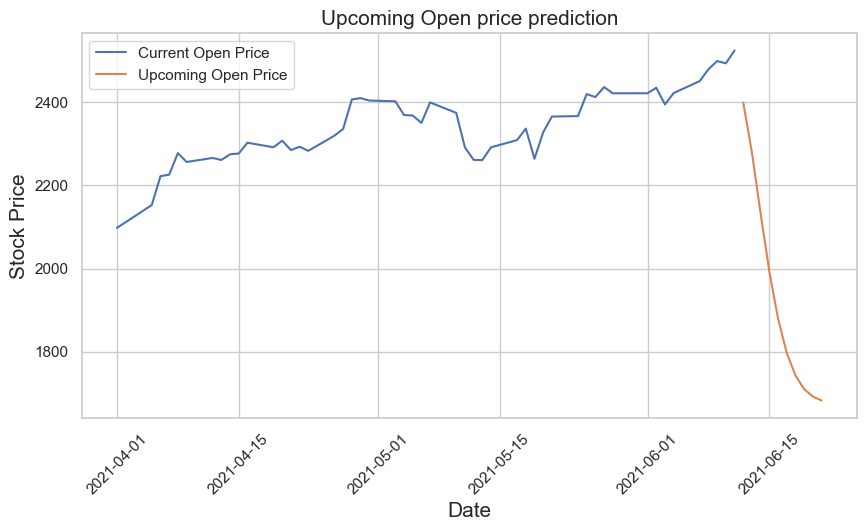

In [50]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

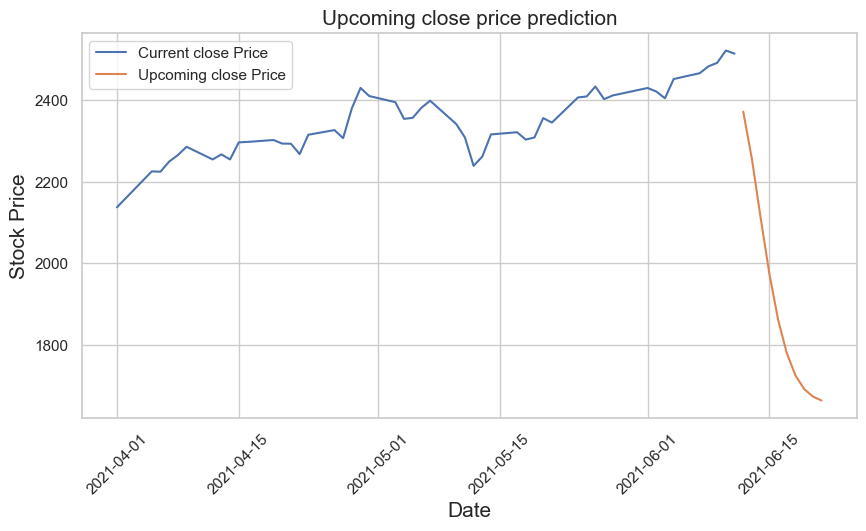

In [51]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

# THANK YOU!